# Thoth: Software Stacks

Within the context of Thoth we store directed acyclic graphs (DAG) representing software packages and dependencies between these software packages. Observations are a vital part of Thoth, they denote certain facts about software packages and stacks. Recommendations are summaries generated from observations.

For more details see the [Thoth Design Document](https://docs.google.com/document/d/1fsQlV7_TYx8pL97XHa0QgdTRIhm9HaFphuZi3mdhsto/edit#).

## Creating Graphs

This is a notebook to experiment with a set of dependency graphs. These graphs have been created from Python applications and they reflect graphs with different versions of package. We call these graphs of versioned packages a 'stack'.

First of all we will include all the required modules and configure matplotlib to draw diagrams inlined in this notebook.

In [1]:
import json

import networkx as nx
from networkx.algorithms.operators.binary import compose
from networkx.readwrite import json_graph
import matplotlib.pyplot as plt

%matplotlib inline

Now we define a function that will read the output of `pipenv graph --json` from a file and create the equivalent graph using `networkx`.

In [2]:
import uuid


def add_package(graph: nx.DiGraph, name: str, version: str) -> bool:
    """add_package() will add a versioned package to the graph.
    
    Args:
        graph (networkx.Graph): the graph to add to
        name (str):             Name of the package
        version (str):          Version of the package
        
    Returns:
        str: the UUID of the node just added or None if something failed.
        
    Raises:
        TBD
    """
    
    _node_id = '{}-{}'.format(name.lower(), version)
    # _node_id = str(uuid.uuid4())
    graph.add_node(_node_id, name=name, 
                   version=version,
                   component='package')
    
    # TODO check for errors and return None
    
    return _node_id

def add_stack_from_file(name: str, version: str, filename: str):
    """add_stack_from_file() will read the output of `pipenv graph --json` and will create a networkx graph from it.
    
    Args:
        name (str):     Name of the Stack
        version (str):  Version of the Stack
        filename (str): The filename storing `pipenv graph --json` output
        
    Returns:
        networkx.Graph: The create graph.
        
    Raises:
        TBD
    """
    
    data = None
    G = None
    
    try:
        with open(filename) as file:    
            data = json.load(file)
    except FileNotFoundError as e:
        print(e)
        return None
        
    if data is not None:
        G = nx.DiGraph(name=name, version=version, component='stack')
        
        for package in data:
            _node_id = add_package(G, name=package['package']['package_name'], 
                        version=package['package']['installed_version'])
            
            for dependency in package['dependencies']:
                _dependency_node_id = add_package(G, name=dependency['package_name'], 
                            version=dependency['installed_version'])
                
                G.add_edge(_node_id, _dependency_node_id, relation='depends_on')
                
    return G

We will read a set of files from the `fixtures/` directory:

In [3]:
PIPENV_GRAPH_FILES = [
    {
        'name': 'tensorflow',
        'version': '1.3.0',
        'filename': 'fixtures/tensorflow-1.3.0.json'
    },
    {
        'name': 'tensorflow',
        'version': '1.4.0',
        'filename': 'fixtures/tensorflow-1.4.0.json'
    }, 
    {
        'name': 'tensorflow',
        'version': '1.4.1',
        'filename': 'fixtures/tensorflow-1.4.1.json'
    },
    {
        'name': 'tensorflow',
        'version': '1.5.0',
        'filename': 'fixtures/tensorflow-1.5.0.json'
    },
    {
        'name': 'tensorflow',
        'version': '1.5.1',
        'filename': 'fixtures/tensorflow-1.5.1.json'
    },
    {
        'name': 'tensorflow',
        'version': '1.6.0',
        'filename': 'fixtures/tensorflow-1.6.0.json'
    }, 
    {
        'name': 'tensorflow',
        'version': '1.7.0',
        'filename': 'fixtures/tensorflow-1.7.0.json'
    },     
    {
        'name': 'tensorflow',
        'version': '1.7.1',
        'filename': 'fixtures/tensorflow-1.7.1.json'
    }, 
    {
        'name': 'tensorflow',
        'version': '1.8.0',
        'filename': 'fixtures/tensorflow-1.8.0.json'
    }, 
    {
        'name': 'tensorflow-flask',
        'version': '1.8.0+1.0',
        'filename': 'fixtures/tensorflow-1.8.0+flask-1.0.json'
    }, 
    {
        'name': 'tensorflow-werkzeug',
        'version': '1.8.0+0.14',
        'filename': 'fixtures/tensorflow-1.8.0+werkzeug-0.14.json'
    },
    {
        'name': 'keras',
        'version': '2.1.2',
        'filename': 'fixtures/keras-2.1.2.json'
    },
    {
        'name': 'keras',
        'version': '2.1.2+tensorflow-1.3.0',
        'filename': 'fixtures/keras-2.1.2-tensorflow-1.3.0.json'
    }
]

Each file will be read and added to our big huge global graph store.

In [4]:
graph_store = []

for entry in PIPENV_GRAPH_FILES:
    _H = add_stack_from_file(entry['name'], entry['version'], entry['filename'])
    
    if _H is not None:
        graph_store.append(_H)


The next cell will create on graph from all the graph in our `graph_store` and draw it with labels added. 

In [5]:
G = nx.DiGraph()

for _G in graph_store:
    G = compose(G, _G)

... and here is the graph <a id='graph_drawing'></a>

{'absl-py-0.2.2': Text(0.0920576,0.903532,'absl-py-0.2.2'),
 'astor-0.6.2': Text(-0.36832,-0.752152,'astor-0.6.2'),
 'bleach-1.5.0': Text(0.0306307,0.359048,'bleach-1.5.0'),
 'click-6.7': Text(-0.276923,0.712255,'click-6.7'),
 'enum34-1.1.6': Text(-0.603215,-0.684261,'enum34-1.1.6'),
 'flask-1.0': Text(-0.042536,0.0451166,'flask-1.0'),
 'gast-0.2.0': Text(-0.567588,0.542301,'gast-0.2.0'),
 'grpcio-1.12.0': Text(-0.0884404,0.476508,'grpcio-1.12.0'),
 'html5lib-0.9999999': Text(-0.101074,0.417999,'html5lib-0.9999999'),
 'itsdangerous-0.24': Text(-0.733716,-0.352164,'itsdangerous-0.24'),
 'jinja2-2.10': Text(1,-0.586869,'jinja2-2.10'),
 'keras-2.1.2': Text(0.0925325,-0.231625,'keras-2.1.2'),
 'markdown-2.6.11': Text(-0.68985,0.285896,'markdown-2.6.11'),
 'markupsafe-1.0': Text(0.973904,-0.725737,'markupsafe-1.0'),
 'numpy-1.14.0': Text(-0.534739,-0.878774,'numpy-1.14.0'),
 'numpy-1.14.3': Text(0.706639,0.25703,'numpy-1.14.3'),
 'protobuf-3.5.1': Text(-0.203584,0.194786,'protobuf-3.5.1'),


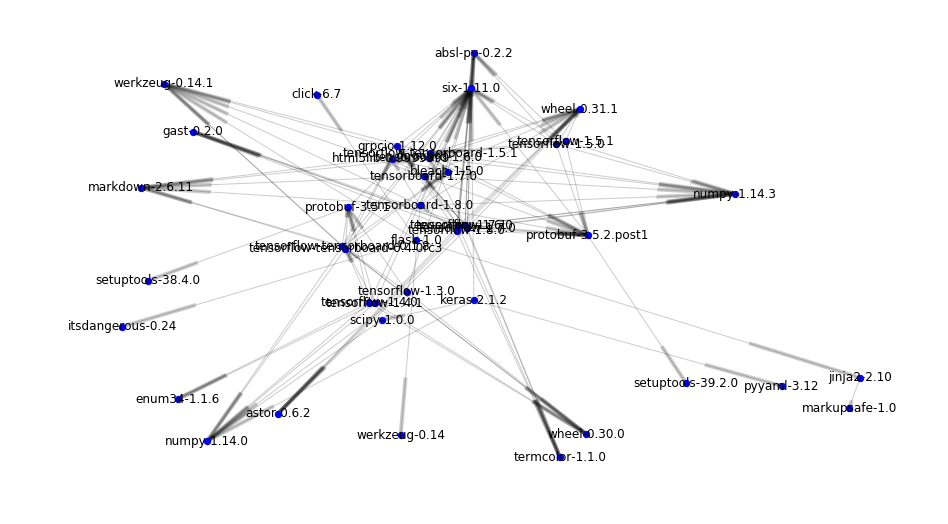

In [6]:
plt.figure(figsize=(16, 9))
plt.axis('off')

pos = nx.spring_layout(G, iterations=20)
labels=dict((n,d['name']) for n,d in G.nodes(data=True))

nx.draw_networkx_nodes(G, pos, labels=labels, node_size=40, node_color='blue')
nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_labels(G, pos, fontsize=12)

## What's next? Observations

Having some software stacks represented as graphs, we can add observations to these graphs.

To create some packages and observations, we will add more packages to the graph which have not been discovered by the provided graph fixtures.

In [7]:
PYPI_FILES = [
    {
        'name': 'numpy',
        'version': '1.9.0',
        'filename': 'fixtures/numpy-1.9.0.json'
    },
    {
        'name': 'pandas',
        'version': '0.21.0',
        'filename': 'fixtures/pandas-0.21.0.json'
    }
]
    
for entry in PYPI_FILES:
    _H = add_stack_from_file(entry['name'], entry['version'], entry['filename'])
    
    if _H is not None:
        G = compose(G, _H)

Each Observation will be a new Node in a Graph, the Observation is related to a Node.

In [8]:
def add_observation(G, O, R, N) -> bool:
    """Add an Observation O related to Node N of Graph G by R.
    
    Args:
        G (networkx.DiGraph):  The Graph
        O (str):               The Node ID of the Observation itself
        R (str):               The observation's relation to the node if has been observed on (edge label)
        N (str):               The Node ID the observation has been made on/about
        
    Returns:
        bool: If the Observation have been added successful.
        
    Raises:
        NodeNotFound If N has not been found in G.
    """
    
    G.add_edge(N, O, relation=R)


### Negative Observations

#### Vulnerabilities

Vulnerabilities are most often expressed by [CVEs](https://en.wikipedia.org/wiki/Common_Vulnerabilities_and_Exposures), and they are one of the observations with a negative impact.

With [numpy <= 1.13.1 a CVE](https://www.cvedetails.com/cve/CVE-2017-12852/) exists. This is our first observation we are adding. It will lead to the fact that any recommendation will exclude all software stacks that include/contain numpy <= 1.31.1.

In [9]:
G.add_node('CVE-2017-12852', name='CVE-2017-12852', version='1.0.0', conclusion='blacklist')
G.add_node('CVE-2018-test-1', name='CVE-2018-test-1', version='1.0.0', conclusion='blacklist')

add_observation(G, 
                'CVE-2017-12852', 
                'affected_by', 
                'numpy-1.9.0')

add_observation(G, 
                'CVE-2018-test-1', 
                'affected_by', 
                'werkzeug-0.14.1')

If you [reuse the cell above to draw the graph](#graph_drawing), you will see the additional node 'CVE-2017-12852'.

### Neutral Observations

#### Build Results

As a matter of fact, each software stack could be associated with a build result, eg it have been build successfully (or not) by a CI pipeline. This kind of result will result in a neutral observation, as the effect is not emidiate. 


In [10]:
G.add_node('build-tensorflow-centos7-python3-37', name='tensorflow-centos7-python3-37', version='1.0.0', conclusion='build-successful')

add_observation(G, 
                'tensorflow-1.4.1', 
                'built', 
                'build-tensorflow-centos7-python3-37')

### Positive Observations

Positive Observation may influence the Recommendations later on. One example of a positive observation may be an increase in performance due to an optimization in the Build Environement.

#### Performance Increase

Due to optimizations in eg BuildEnvironment ...

## Writing the graph

... and the next cell is just for debugging...

Let's write the [JSON respresentation of the graph](https://networkx.github.io/documentation/stable/reference/readwrite/generated/networkx.readwrite.json_graph.node_link_data.html#networkx.readwrite.json_graph.node_link_data) to a file, so we can use it with d3. Maybe you can [click on this link](http://localhost:8080/pipenv-graph2networkx/stacks.html) and it will simpley work...

In [11]:
with open('stacks.json', 'w') as output:
    data = json_graph.node_link_data(G)
    
    output.write(json.dumps(data))


If everything worked out, you should see a graphic like the one below. On the upper right corner you see the CVE, following the links it should clearly exclude `pandas 0.21.0` from any recommendation!
![Stacks](stacks.png)

## Recommendations
<a id='recommendations'></a>

This section will go into making recommendations. One of our assumption is, that we would like to create stacks will fully qualified/versioned dependencies. This way we will ensure, that the resulting graph is predictable. If no version is supplied, the latest stack version is used.

In [12]:
def create_subgraph(G: nx.DiGraph, start_node) -> nx.DiGraph:
    """This will return the subgraph starting at a specific node
    """
    nodes = nx.single_source_shortest_path(G, start_node).keys()

    return G.subgraph(nodes).copy()

def get_versioned_stack(name: str, version: str) -> nx.DiGraph:
    """
    """
    
    # TODO if no version is supplied, use the latest
    S = None
    
    try:
        S = create_subgraph(G, '{}-{}'.format(name, version))
    except nx.NodeNotFound as e:
        print(e)
        return None # TODO raise nx.NodeNotFound

    blacklisted_packages = nx.get_node_attributes(G,'conclusion')
    
    for node_id in blacklisted_packages.keys():
        if node_id in S.nodes():
            print('This stack has been blacklisted due to {}'.format(S.nodes[node_id]))
            return None # TODO raise StackIsBlacklisted(S.nodes[node_id])
            
    return S

Good, lets get a stack, for example Tensorflow 1.4.0

In [16]:
G_tf140 = get_versioned_stack('tensorflow', '1.8.0')

if G_tf140 is not None:
    nx.draw_spectral(G_tf140)
    labels=nx.draw_networkx_labels(G_tf140, pos=nx.spectral_layout(G_tf140))

This stack has been blacklisted due to {'name': 'CVE-2018-test-1', 'version': '1.0.0', 'conclusion': 'blacklist'}


... or Pandas 0.21.0

In [14]:
G_pandas = get_versioned_stack('pandas', '0.21.0')

if G_pandas is not None:
    nx.draw_spectral(G_pandas)
    labels=nx.draw_networkx_labels(G_pandas, pos=nx.spectral_layout(G_pandas))

This stack has been blacklisted due to {'name': 'CVE-2017-12852', 'version': '1.0.0', 'conclusion': 'blacklist'}


## Using a Recommendation
<a id='using_a_recommendation'></a>

So what is the purpos of this recommendation? We want to provide guidance to developers and recommend a full qualified software stack that is known to be 'good'. That software stack should build (to our knowledge using our refenrence build pipeline) and have no known CVE.

We expect developeres to use our recommendation to create a containerized software stack, therefor a Recommendation is translated into a `Dockerfile(-snipped)`.

In [15]:
def rreplace(s, old, new, occurrence):
    """Thanks https://stackoverflow.com/questions/2556108/rreplace-how-to-replace-the-last-occurrence-of-an-expression-in-a-string"""
    li = s.rsplit(old, occurrence)
    
    return new.join(li)

def version_stack_to_Dockerfile_snippet(graph: nx.DiGraph) -> str:
    """
    """
    
    rc = 'RUN pip install \\\n'
    for n in graph:
        rc += '        {} \\\n'.format(rreplace(n, '-', '==', 1))
    
    return rc[:-3] # we remove the trailing \


G_tf140 = get_versioned_stack('tensorflow', '1.4.0')

print("""FROM fedora:27

{}
""".format(version_stack_to_Dockerfile_snippet(G_tf140)))

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 0))



This stack has been blacklisted due to {'name': 'CVE-2018-test-1', 'version': '1.0.0', 'conclusion': 'blacklist'}


TypeError: 'NoneType' object is not iterable

This function (and others) shall be extracted in a web service, see also https://trello.com/c/ekNhZDs1

## Experiments

The next section is just some kind of playground...

In [ ]:
import pandas as pd
import numpy as np

df = nx.to_pandas_adjacency(G, dtype=int)

df


In [ ]:
import networkx as nx
from node2vec import Node2Vec

# FILES
EMBEDDING_FILENAME = './embeddings.emb'
EMBEDDING_MODEL_FILENAME = './embeddings.model'

# Create a graph
#graph = nx.fast_gnp_random_graph(n=50, p=0.5,directed=True)
graph = nx.Graph(G)

# Precompute probabilities and generate walks
node2vec = Node2Vec(graph, dimensions=4, walk_length=3, num_walks=2)

# Embed
model = node2vec.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `diemnsions` and `workers` are automatically passed (from the Node2Vec constructor)

# Look for most similar nodes
print(model.wv.most_similar('tensorflow-1.4.1'))  # Output node names are always strings

# Save embeddings for later use
model.wv.save_word2vec_format(EMBEDDING_FILENAME)
print(graph.nodes(data=True))

# Save model for later use
model.save(EMBEDDING_MODEL_FILENAME)